#Importing data processing libraries

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
%matplotlib inline

In [69]:
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Importing the file from its directory and getting the first five rows

In [70]:
df= pd.read_csv(r'C:\Users\MY PC\Documents\Data Frame\CensusDB.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K


Describing the statistics of numerical columns

In [71]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Getting to see if there are missing data. Obviously, there are non.

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


Getting the list of columns in the data set

In [73]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [74]:
categorical_cols= df.select_dtypes(include='object').columns.tolist()
print(categorical_cols)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'sex', 'native-country', 'income']


In [75]:
numeric_cols= df.select_dtypes(include=np.number).columns.tolist()
print(numeric_cols)

['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


Both the categorical columns and numerical columns are printd above

In [9]:
df['marital-status'].value_counts(normalize=True)*100

Married-civ-spouse       45.993673
Never-married            32.809189
Divorced                 13.645158
Separated                 3.147938
Widowed                   3.049661
Married-spouse-absent     1.283744
Married-AF-spouse         0.070637
Name: marital-status, dtype: float64

This data shows 46% of the population are in relationship with their spouse. This means larger percentage of the people are married as at the time of this survey

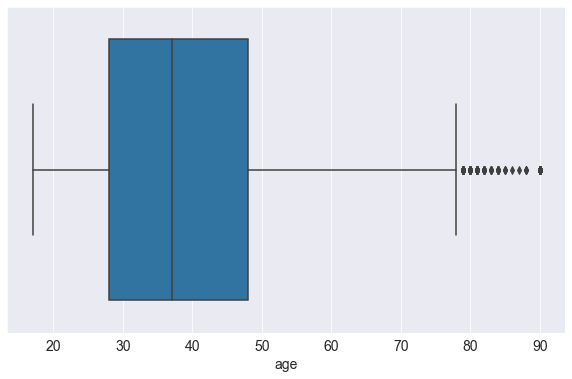

In [10]:
sns.boxplot(x='age',data=df);

There are few outliers in the age columns. The youngest person is 17 years old and the oldest person is 90 years old.

In [79]:
df['occupation'].mode()

0    Prof-specialty
dtype: object

In [80]:
df['occupation'].replace(to_replace='?',value='Prof-specialty',inplace=True)

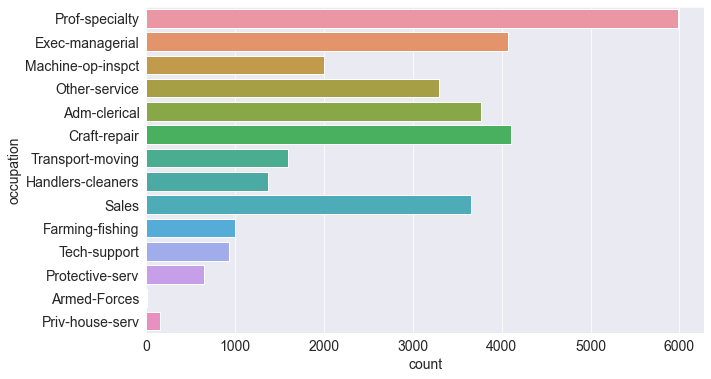

In [82]:
sns.countplot(y='occupation',data=df);

People with professional specialty occupations are many than other kinds of occupation

In [85]:
df['occupation'].value_counts(normalize=True)*100 #18.3% of the population works as a Prof-specialty

Prof-specialty       18.374743
Craft-repair         12.588680
Exec-managerial      12.487331
Adm-clerical         11.578268
Sales                11.209729
Other-service        10.119468
Machine-op-inspct     6.148460
Transport-moving      4.904641
Handlers-cleaners     4.207487
Farming-fishing       3.052732
Tech-support          2.850035
Protective-serv       1.993182
Priv-house-serv       0.457603
Armed-Forces          0.027640
Name: occupation, dtype: float64

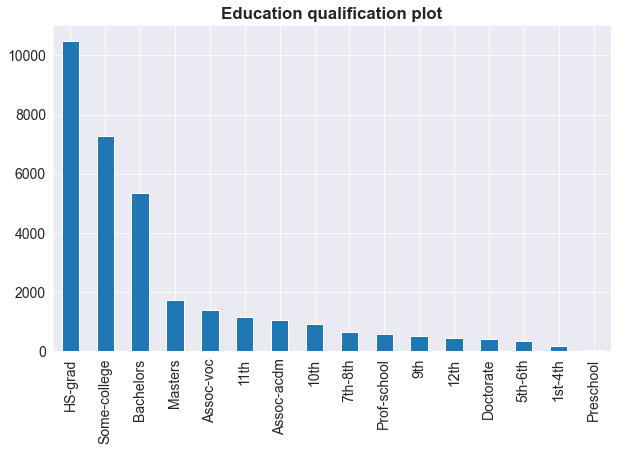

In [91]:
df['education'].value_counts().plot(kind='bar');
plt.title('Education qualification plot',fontweight='bold');

In [96]:
df['education'].value_counts(normalize=True)*100 # 32.2% of the population are high school grader, and that is the highest

HS-grad         32.250238
Some-college    22.391818
Bachelors       16.446055
Masters          5.291607
Assoc-voc        4.244341
11th             3.608612
Assoc-acdm       3.276926
10th             2.865391
7th-8th          1.983969
Prof-school      1.768987
9th              1.578576
12th             1.329812
Doctorate        1.268389
5th-6th          1.022696
1st-4th          0.515955
Preschool        0.156629
Name: education, dtype: float64

The above plot shows that majority of the people are high school grader

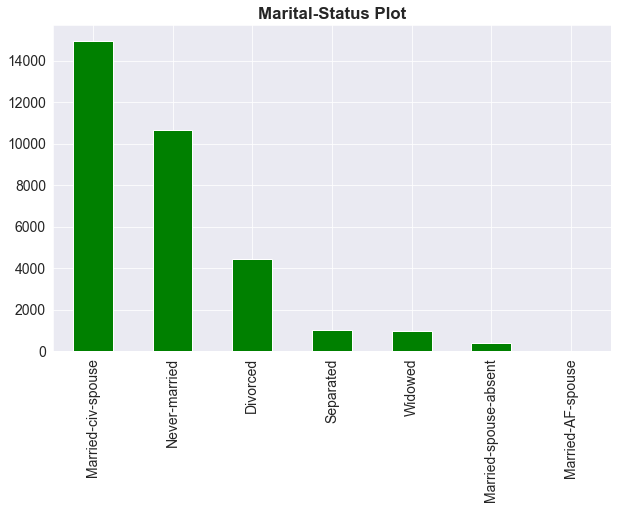

In [110]:
plt.figure(figsize=(10,6))
df['marital-status'].value_counts().plot(kind='bar',color='green');
plt.title('Marital-Status Plot',fontweight='bold');

In [109]:
df['marital-status'].value_counts(normalize=True)*100

Married-civ-spouse       45.993673
Never-married            32.809189
Divorced                 13.645158
Separated                 3.147938
Widowed                   3.049661
Married-spouse-absent     1.283744
Married-AF-spouse         0.070637
Name: marital-status, dtype: float64

As said earlier, larger percentage of the people are married as it can be seen on the plot.

In [98]:
df['workclass'].replace(to_replace='?',value='Private',inplace=True)

In [99]:
df['workclass'].value_counts(normalize=True)*100

Private             75.341666
Self-emp-not-inc     7.803814
Local-gov            6.427935
State-gov            3.986364
Self-emp-inc         3.427413
Federal-gov          2.948312
Without-pay          0.042996
Never-worked         0.021498
Name: workclass, dtype: float64

75% of the population are working in the private sector. Why ?

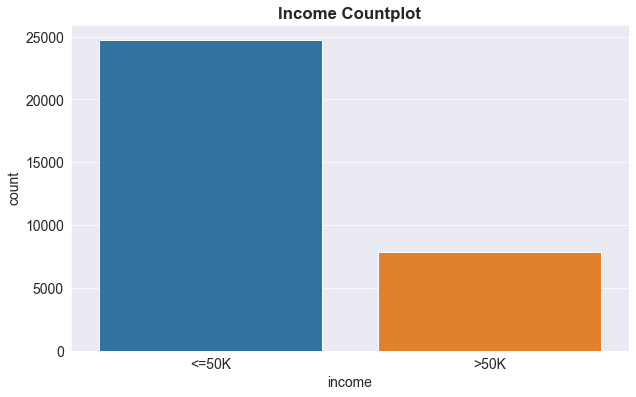

In [135]:
sns.countplot(x='income',data=df);
plt.title('Income Countplot',fontweight='bold');

In [136]:
df['income'].value_counts(normalize=True)*100

<=50K    75.919044
>50K     24.080956
Name: income, dtype: float64

75% of the population works in the private sector and People with a lesser income are with the same percentage. Let's say people with lesser job qualifications are employed by the private companies. There is a great relationship between income and educational qualifications

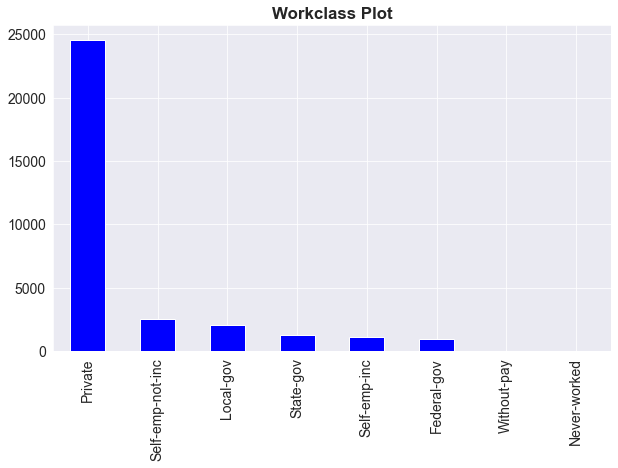

In [137]:
df['workclass'].value_counts().plot(kind='bar',color='blue');
plt.title('Workclass Plot',fontweight='bold');

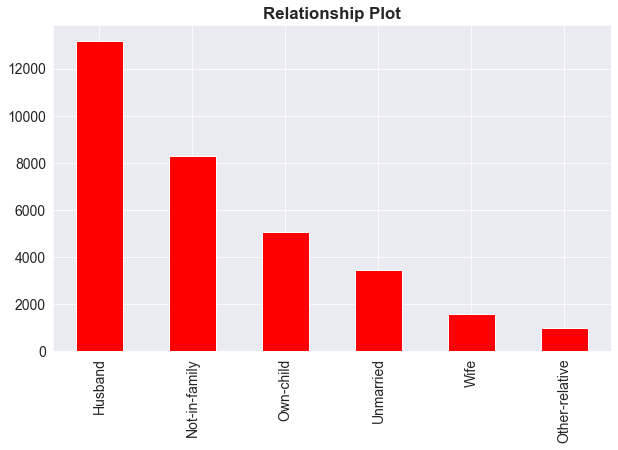

In [115]:
df['relationship'].value_counts().plot(kind='bar',color='red');
plt.title('Relationship Plot',fontweight='bold');

The above plot validates the fact that more people are in relationship with their spouse

In [19]:
country_grp = df.groupby('native-country')
country_grp

In [120]:
country_grp.get_group('United-States').iloc[0:20]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,Private,77053,HS-grad,9,Widowed,?,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,?,Unmarried,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,Female,0,3683,40,United-States,<=50K
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Female,0,3004,35,United-States,>50K


In [123]:
df['native-country'].value_counts(normalize=True)*100 # Out of the population, 89.5% of the populace are citizens of the US

United-States                 89.585701
Mexico                         1.974755
?                              1.790486
Philippines                    0.608089
Germany                        0.420749
Canada                         0.371610
Puerto-Rico                    0.350112
El-Salvador                    0.325543
India                          0.307116
Cuba                           0.291760
England                        0.276404
Jamaica                        0.248764
South                          0.245693
China                          0.230337
Italy                          0.224195
Dominican-Republic             0.214981
Vietnam                        0.205768
Guatemala                      0.196554
Japan                          0.190412
Poland                         0.184270
Columbia                       0.181198
Taiwan                         0.156629
Haiti                          0.135131
Iran                           0.132060
Portugal                       0.113633


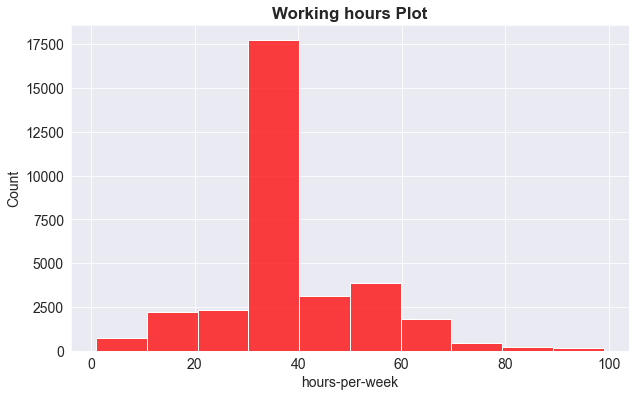

In [130]:
sns.histplot(x=df['hours-per-week'],color='red',fill=True,bins=10);
plt.title('Working hours Plot',fontweight='bold');

Majority of the people works 40hrs per week. As seen on the distribution plot

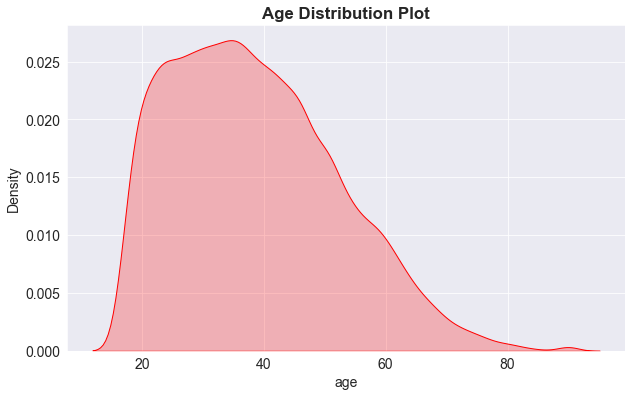

In [22]:
sns.kdeplot(x=df['age'],color='red',fill=True);
plt.title('Age Distribution Plot',fontweight='bold');

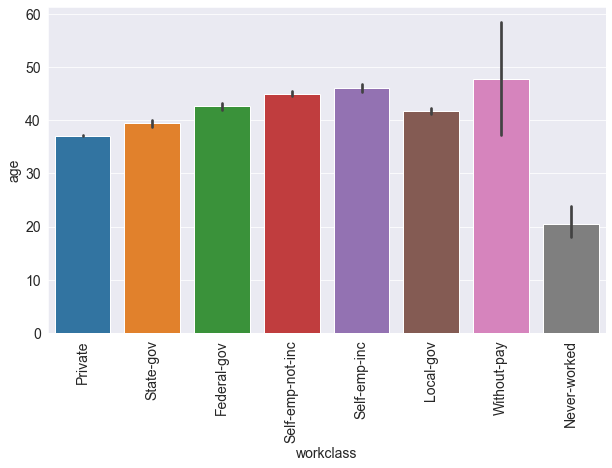

In [23]:
sns.barplot(x='workclass',y='age',data=df)
plt.xticks(rotation=90);

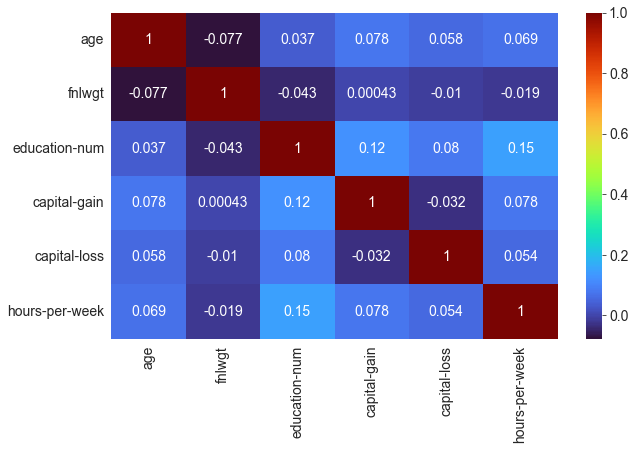

In [132]:
sns.heatmap(df.corr(),cmap='turbo',annot=True);

Correlation chart between the numerical columns

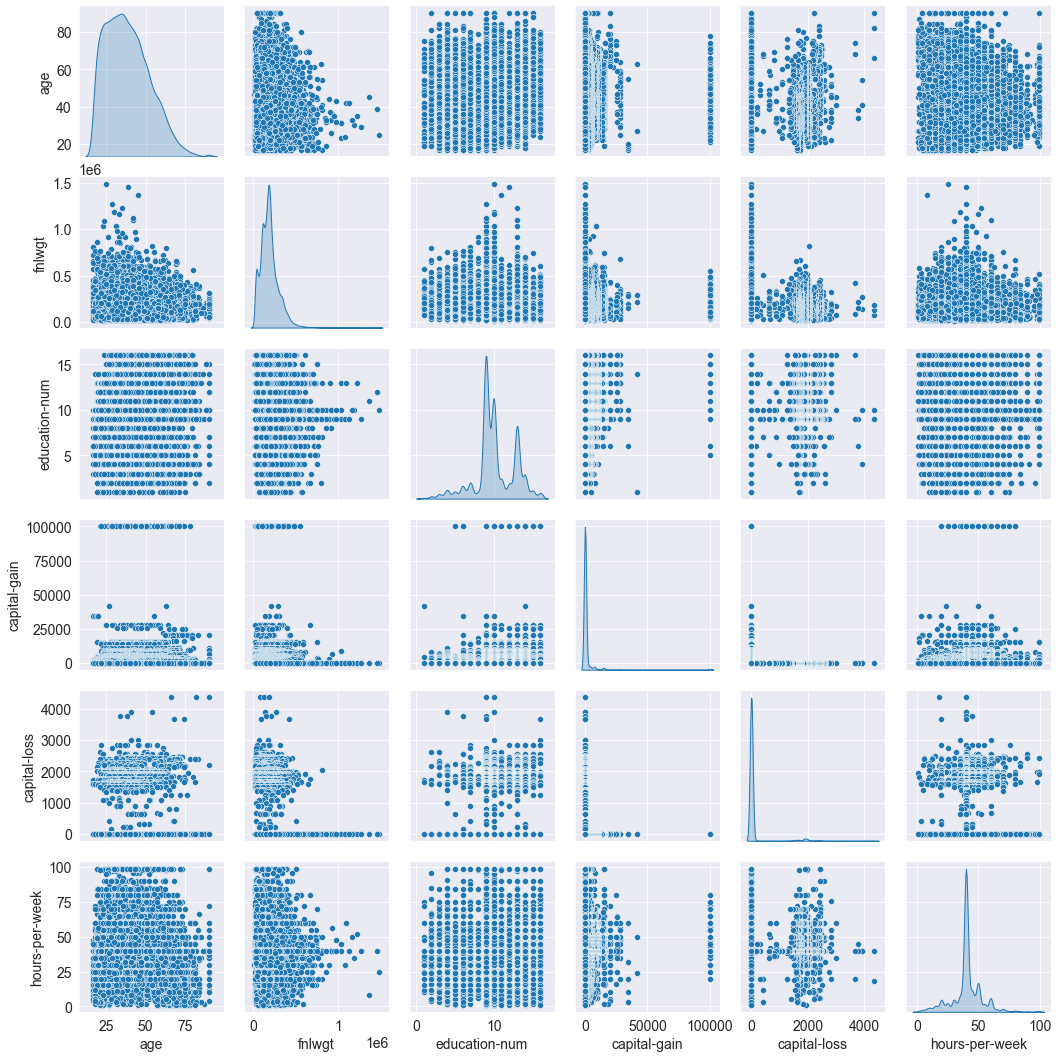

In [25]:
sns.pairplot(data=df,diag_kind='kde');

In [139]:
df =pd.get_dummies(df)
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,90,77053,9,0,4356,40,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1,82,132870,9,0,4356,18,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
2,66,186061,10,0,4356,40,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,54,140359,4,0,3900,40,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,41,264663,10,0,3900,40,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [140]:
df.drop(columns=['income_<=50K','education-num'],axis=1,inplace=True)

In [268]:
print(df['education_Bachelors'].corr(df['income_>50K']))
print(df['education_HS-grad'].corr(df['income_>50K']))
print(df['education_Prof-school'].corr(df['income_>50K']))
df['education_Some-college'].corr(df['income_>50K'])
df['education_Masters'].corr(df['income_>50K'])
df['age'].corr(df['income_>50K'])

0.18048542920208077
-0.13118854401281224
0.15490683578935988


0.23403710264885658

Correlation of some selected columns with the income columns. 

In [141]:
df.columns

Index(['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       ...
       'native-country_Puerto-Rico', 'native-country_Scotland',
       'native-country_South', 'native-country_Taiwan',
       'native-country_Thailand', 'native-country_Trinadad&Tobago',
       'native-country_United-States', 'native-country_Vietnam',
       'native-country_Yugoslavia', 'income_>50K'],
      dtype='object', length=101)

In [142]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [143]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [144]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [145]:
scaler = StandardScaler()
scaler

StandardScaler()

In [146]:
X_train = scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

In [147]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5,max_leaf_nodes=125,random_state=42)
model

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=125, random_state=42)

In [148]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=125, random_state=42)

In [149]:
y_pred_train= model.predict(X_train)
y_pred_train

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [150]:
model.predict_proba(X_train)*100

array([[97.55142909,  2.44857091],
       [97.55142909,  2.44857091],
       [97.55142909,  2.44857091],
       ...,
       [ 2.33050847, 97.66949153],
       [69.87996999, 30.12003001],
       [91.68646081,  8.31353919]])

In [151]:
y_pred_test= model.predict(X_test)
y_pred_test

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [152]:
model.predict_proba(X_test)*100

array([[69.87996999, 30.12003001],
       [97.55142909,  2.44857091],
       [69.87996999, 30.12003001],
       ...,
       [29.6108291 , 70.3891709 ],
       [97.55142909,  2.44857091],
       [69.87996999, 30.12003001]])

In [221]:
accuracy_score(y_train,y_pred_train)*100
print('The accuracy score for decision tree on the training set is:',accuracy_score(y_train,y_pred_train)*100,'%')

The accuracy score for decision tree on the training set is: 84.82800982800983 %


In [211]:
accuracy_score(y_test,y_pred_test)*100
print('The accuracy score for decision tree on the test set is:',accuracy_score(y_test,y_pred_test)*100,'%')

The accuracy score for decision tree on the test set is: 83.09534776600644 %


In [157]:
confusion_matrix(y_test,y_pred_test)

array([[4737,  239],
       [ 862,  675]], dtype=int64)

In [158]:
model.tree_.max_depth

5

In [159]:
model.classes_

array([0, 1], dtype=uint8)

In [225]:
def max_depth_error(md):
    model= DecisionTreeClassifier(max_depth=md,random_state=42)
    model.fit(X_train,y_train)
    train_error = 1-accuracy_score(y_train,y_pred_train)
    test_error= 1-accuracy.score(y_test,y_pred_test)
    return {'Max depth':md,'Training error':train_error,'Testing error':test_error}

In [ ]:
pd.DataFrame({'Max Depth':md,'Training Error':train_error,'Testing Error':test_error} for md in range(1,21))

In [178]:
from sklearn.ensemble import RandomForestClassifier

In [235]:
random = RandomForestClassifier(random_state=0,n_estimators=1000,
                                criterion='gini',max_features='auto',
                                oob_score=3,n_jobs=3,min_impurity_decrease=0.5)

In [236]:
random.fit(X_train,y_train)

RandomForestClassifier(min_impurity_decrease=0.5, n_estimators=1000, n_jobs=3,
                       oob_score=3, random_state=0)

In [237]:
random.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [238]:
accuracy_score(y_train,random.predict(X_train))*100
print('The accuracy score for random forest on the training set is:',accuracy_score(y_train,random.predict(X_train))*100,'%')

The accuracy score for random forest on the training set is: 75.7985257985258 %


In [239]:
random.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [240]:
accuracy_score(y_test,random.predict(X_test))*100
print('The accuracy score for random forest on the test set is:',accuracy_score(y_test,random.predict(X_test))*100,'%')

The accuracy score for random forest on the test set is: 76.40104406571473 %


In [161]:
from xgboost import XGBClassifier

In [162]:
xgb_clf= XGBClassifier()
xgb_clf

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)

In [163]:
xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [164]:
y_xg_train= xgb_clf.predict(X_train)
pd.value_counts(y_xg_train)

0    20673
1     5375
dtype: int64

In [165]:
y_xg_test= xgb_clf.predict(X_test)
pd.value_counts(y_xg_test)

0    5316
1    1197
dtype: int64

In [247]:
accuracy_score(y_train,y_xg_train)*100
print('The accuracy score for XGBOOST on the training set is:',accuracy_score(y_train,xgb_clf.predict(X_train))*100,'%')

The accuracy score for XGBOOST on the training set is: 90.42152948402948 %


In [249]:
accuracy_score(y_test,y_xg_test)*100
print('The accuracy score for XGBOOST on the test set is:',accuracy_score(y_test,xgb_clf.predict(X_test))*100,'%')

The accuracy score for XGBOOST on the test set is: 84.70750806080147 %


In [ ]:
importance_df = pd.DataFrame({'feature':X_train.columns,'importance':model.feature_importances_}).sort_values('importance',
                                                                                                             ascending=False)
importance_df.head(10)

In [ ]:
plt.bar(x=importance_df['feature'],y=importance_df['importance'],height=0.8)

In [170]:
from sklearn.ensemble import GradientBoostingClassifier

In [171]:
gbclass = GradientBoostingClassifier()
gbclass

GradientBoostingClassifier()

In [172]:
gbclass.fit(X_train,y_train)

GradientBoostingClassifier()

In [173]:
gbclass_train= gbclass.predict(X_train)
gbclass_train

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [252]:
gbclass_test= gbclass.predict(X_test)
pd.value_counts(gbclass_test)

0    5442
1    1071
dtype: int64

In [250]:
accuracy_score(y_test,gbclass_test)*100
print('The accuracy score for Gradient Boosting on the test set is:',accuracy_score(y_test,gbclass.predict(X_test))*100,'%')

The accuracy score for Gradient Boosting on the test set is: 85.16812528788577 %


In [251]:
accuracy_score(y_train,gbclass_train)*100
print('The accuracy score for Gradient Boosting on the training set is:',accuracy_score(y_train,gbclass.predict(X_train))*100,'%')

The accuracy score for Gradient Boosting on the training set is: 86.70915233415234 %


# Conclusion:
**1.Decision Tree Classifier
**2.Random Forest Classifier
**3.XGBOOST
**4.Gradient Boosting Classifier.

**Out of the four, Gradient Boosting has an accuracy score of 86.70% which is good. It predicted majority of the populace earns below 50k dollars. This can be linked to the fact that larger percentage of the people are high school grader. The higher the educational qualifications, the more their income.
 **Age is another factor that determines high income. The higher the educational qualifications , the older the person. Not in all case though.

In [ ]:
scaler.transform(X[numeric_col.columns])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model

In [ ]:
model.fit(X_train,y_train)

In [ ]:
model.feature_importances_

In [ ]:
y_pred_train= model.predict(X_train)
y_pred_train

In [ ]:
y_pred_test = model.predict(X_test)
y_pred_test

In [ ]:
plt.figure(figsize=(10,6))
pd.value_counts(y_pred_train).plot(kind='bar',color='red');
plt.title('Outcome plot for target variable',fontweight='bold')

print(pd.value_counts(y_pred_train,normalize=True))

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
accuracy_score(y_pred_train,y_train)

In [ ]:
accuracy_score(y_pred_test,y_test)

In [ ]:
pd.value_counts(y_pred_test,normalize=True)

In [ ]:
df_x_train= pd.DataFrame(X_train,columns=['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week'])

In [ ]:
my_list =[]
for i in range(1,1000):
    if i%2==0:
        print(i)
my_list.append(i)

In [ ]:
importance_df